
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
test_data = (x_test, y_test)

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
len(x_train)

60000

In [5]:
len(y_train)

60000

In [6]:
len(x_test)

10000

In [7]:
len(y_test)

10000

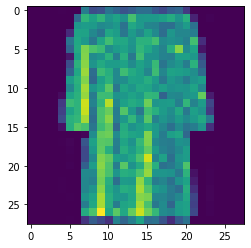

In [8]:
plt.imshow(x_train[np.random.randint(1,60001)])

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [10]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [11]:
trainX = trainX/255
testX = testX/255

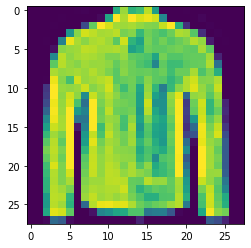

In [12]:
plt.imshow(x_test[50])

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils

In [14]:
trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=10, activation='softmax'))

In [16]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [18]:
model = classifier.fit(trainX, trainY,
 batch_size=128, epochs=20,
 verbose=2,
 validation_data=(testX, testY))

Epoch 1/20
469/469 - 21s - loss: 0.5695 - accuracy: 0.7948 - val_loss: 0.4087 - val_accuracy: 0.8472 - 21s/epoch - 44ms/step
Epoch 2/20
469/469 - 6s - loss: 0.3670 - accuracy: 0.8664 - val_loss: 0.3433 - val_accuracy: 0.8743 - 6s/epoch - 13ms/step
Epoch 3/20
469/469 - 4s - loss: 0.3163 - accuracy: 0.8836 - val_loss: 0.3111 - val_accuracy: 0.8846 - 4s/epoch - 9ms/step
Epoch 4/20
469/469 - 4s - loss: 0.2864 - accuracy: 0.8949 - val_loss: 0.2898 - val_accuracy: 0.8956 - 4s/epoch - 8ms/step
Epoch 5/20
469/469 - 4s - loss: 0.2629 - accuracy: 0.9033 - val_loss: 0.2769 - val_accuracy: 0.8970 - 4s/epoch - 8ms/step
Epoch 6/20
469/469 - 4s - loss: 0.2443 - accuracy: 0.9104 - val_loss: 0.2658 - val_accuracy: 0.9038 - 4s/epoch - 8ms/step
Epoch 7/20
469/469 - 4s - loss: 0.2283 - accuracy: 0.9156 - val_loss: 0.2699 - val_accuracy: 0.9016 - 4s/epoch - 8ms/step
Epoch 8/20
469/469 - 4s - loss: 0.2157 - accuracy: 0.9206 - val_loss: 0.2557 - val_accuracy: 0.9058 - 4s/epoch - 8ms/step
Epoch 9/20
469/469 -

**Plot values of metrics you used in your model.**

In [19]:
summary = pd.DataFrame(classifier.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.569508,0.794783,0.408701,0.8472
1,0.367006,0.866433,0.343283,0.8743
2,0.316350,0.883617,0.311145,0.8846
3,0.286420,0.894933,0.289831,0.8956
4,0.262915,0.903283,0.276900,0.8970


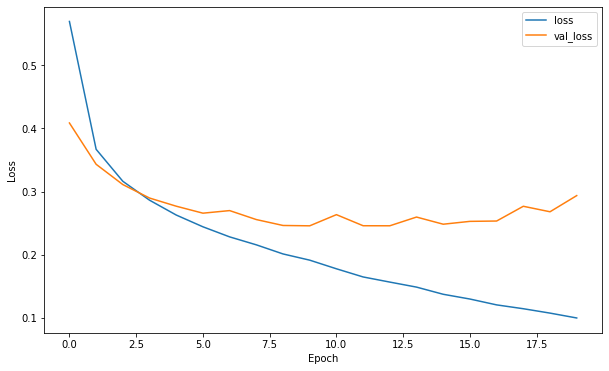

In [20]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [23]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=10, activation='softmax'))

In [24]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model = classifier.fit(trainX, trainY,
 batch_size=128, epochs=30,
 verbose=2,
 validation_data=(testX, testY),callbacks=[early_stop])

Epoch 1/30
469/469 - 5s - loss: 0.5683 - accuracy: 0.7917 - val_loss: 0.3876 - val_accuracy: 0.8580 - 5s/epoch - 10ms/step
Epoch 2/30
469/469 - 4s - loss: 0.3600 - accuracy: 0.8692 - val_loss: 0.3348 - val_accuracy: 0.8759 - 4s/epoch - 8ms/step
Epoch 3/30
469/469 - 4s - loss: 0.3159 - accuracy: 0.8838 - val_loss: 0.3058 - val_accuracy: 0.8864 - 4s/epoch - 8ms/step
Epoch 4/30
469/469 - 4s - loss: 0.2854 - accuracy: 0.8953 - val_loss: 0.2860 - val_accuracy: 0.8929 - 4s/epoch - 8ms/step
Epoch 5/30
469/469 - 4s - loss: 0.2641 - accuracy: 0.9012 - val_loss: 0.2883 - val_accuracy: 0.8948 - 4s/epoch - 8ms/step
Epoch 6/30
469/469 - 4s - loss: 0.2444 - accuracy: 0.9100 - val_loss: 0.2619 - val_accuracy: 0.9034 - 4s/epoch - 8ms/step
Epoch 7/30
469/469 - 4s - loss: 0.2324 - accuracy: 0.9140 - val_loss: 0.2616 - val_accuracy: 0.9045 - 4s/epoch - 8ms/step
Epoch 8/30
469/469 - 4s - loss: 0.2165 - accuracy: 0.9197 - val_loss: 0.2540 - val_accuracy: 0.9065 - 4s/epoch - 8ms/step
Epoch 9/30
469/469 - 4s

**Plot values of metrics you used in your model.**

In [26]:
summary = pd.DataFrame(classifier.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.568305,0.791717,0.387585,0.8580
1,0.359950,0.869217,0.334840,0.8759
2,0.315931,0.883783,0.305845,0.8864
3,0.285427,0.895333,0.286048,0.8929
4,0.264091,0.901200,0.288327,0.8948


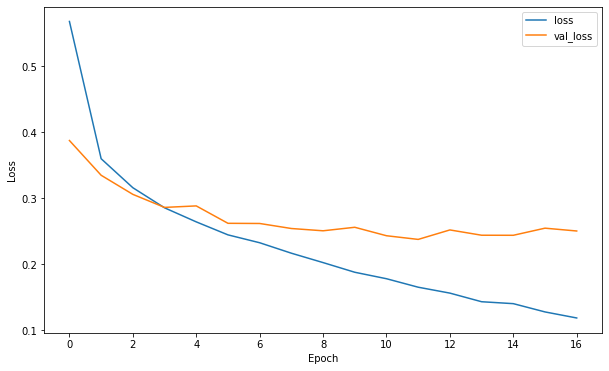

In [27]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
predict_x=classifier.predict(testX) 
classes_x=np.argmax(predict_x,axis=1)

In [30]:
classes_x

array([9, 2, 1, ..., 8, 1, 5])

In [31]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.93      0.92      0.93      1000
           4       0.86      0.88      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.78      0.71      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000



# Prediction

In [32]:
classes = ["T-shirt/top",
           "Trouser",
           "Pullover",
           "Dress",
           "Coat",
           "Sandal",
           "Shirt",
           "Sneaker",
           "Bag",
           "Ankle boot"]

In [33]:
my_image = testX[500]

In [34]:
my_image = np.expand_dims(my_image, axis=0)


In [35]:
my_image.shape

(1, 28, 28, 1)

In [36]:
result = classifier.predict(my_image).round().argmax()


In [37]:
classes[int(result)]

'Pullover'

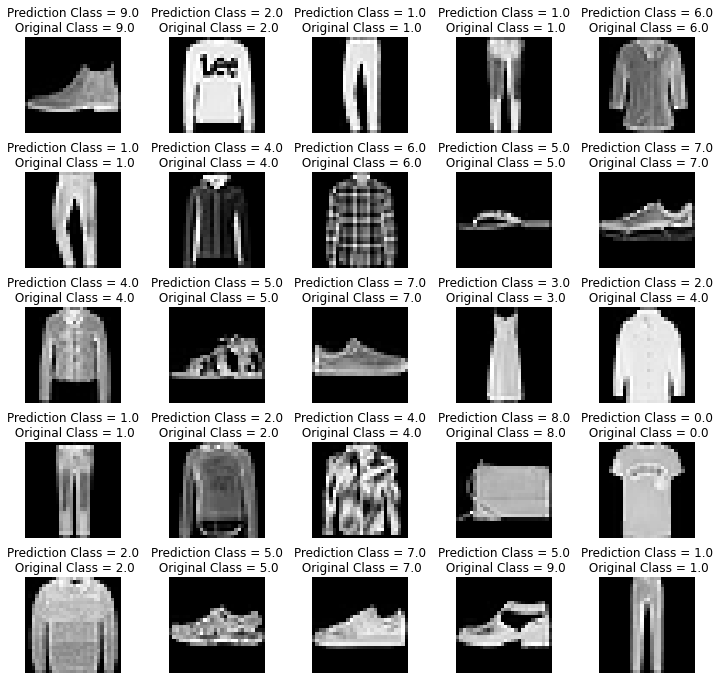

In [38]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28),cmap="gray")
    axes[i].set_title(f"Prediction Class = {classes_x[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)